In [8]:
from pager import ImageModel, WordsModel, RowsModel, RegionModel, Image2Words, Words2Rows, Rows2Regions , PDF2Img, PDFModel, PDF2Words, PDF2Rows

pdf = PDFModel()
img = ImageModel()
words = WordsModel()
rows = RowsModel()
regions = RegionModel()

pdf2img = PDF2Img()
pdf2words = PDF2Words()
img2words = Image2Words()

pdf2rows = PDF2Rows()
words2rows = Words2Rows()
rows2regions = Rows2Regions()

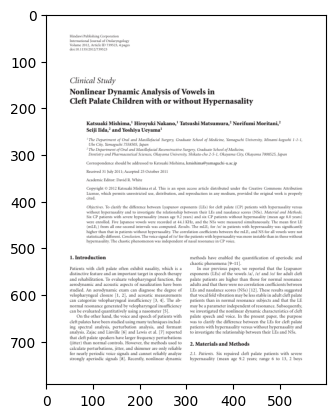

In [10]:
pdf.read_from_file('../../../Документы/PMC3236469_00000.pdf', 'r')
pdf2img.convert(pdf, img)
img.show()

# img.read_from_file('../tests/files/segment_test.png')
# img.show()

In [11]:
pdf2rows.convert(pdf, rows)


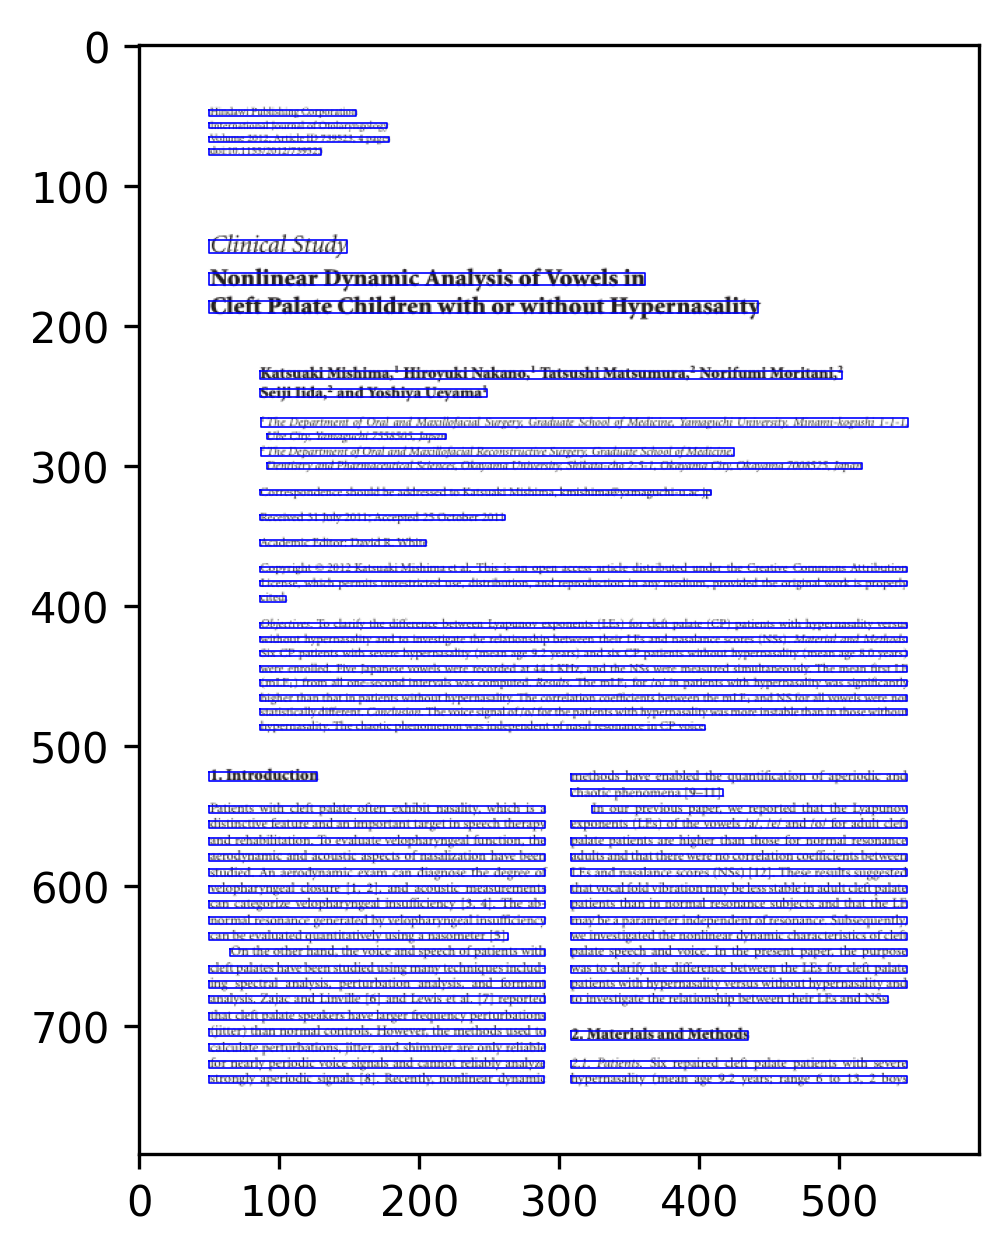

In [16]:
import matplotlib.pyplot as plt

plt.figure(dpi=300)
img.show()
for row in rows.rows:
    row.segment.plot(color='b', width=0.4)



In [18]:
from pager.page_model.sub_models.dtype import ImageSegment

In [57]:

segments = [r.segment for r in rows.rows]

big_region = ImageSegment(0, 0, 1, 1)
big_region.set_segment_max_segments(segments)
coef_hw = big_region.height/big_region.width

In [58]:
N = int(len(rows.rows)**0.5)
M = int(coef_hw*N)

dh = int(big_region.height/(M+1))
dw = int(big_region.width/(N+1))

x0, y0 = big_region.x_top_left, big_region.y_top_left
x_end, y_end = big_region.x_bottom_right, big_region.y_bottom_right

In [59]:
def get_segment(i, j):
    if i != N and j != M:
        return ImageSegment(x0+i*dw, y0+j*dh, x0+(i+1)*dw-1, y0+(j+1)*dh-1)
    elif i == N and j != M:
        return ImageSegment(x0+i*dw, y0+j*dh, x_end, y0+(j+1)*dh-1)
    elif i != N and j == M:
        return ImageSegment(x0+i*dw, y0+j*dh, x0+(i+1)*dw-1, y_end)
    else:
        return ImageSegment(x0+i*dw, y0+j*dh, x_end, y_end)

hash_image_seg = [[get_segment(i, j) for i in range(N+1)] for j in range(M+1)]
hash_matrix = [[[] for _ in range(N+1)] for _ in range(M+1)]

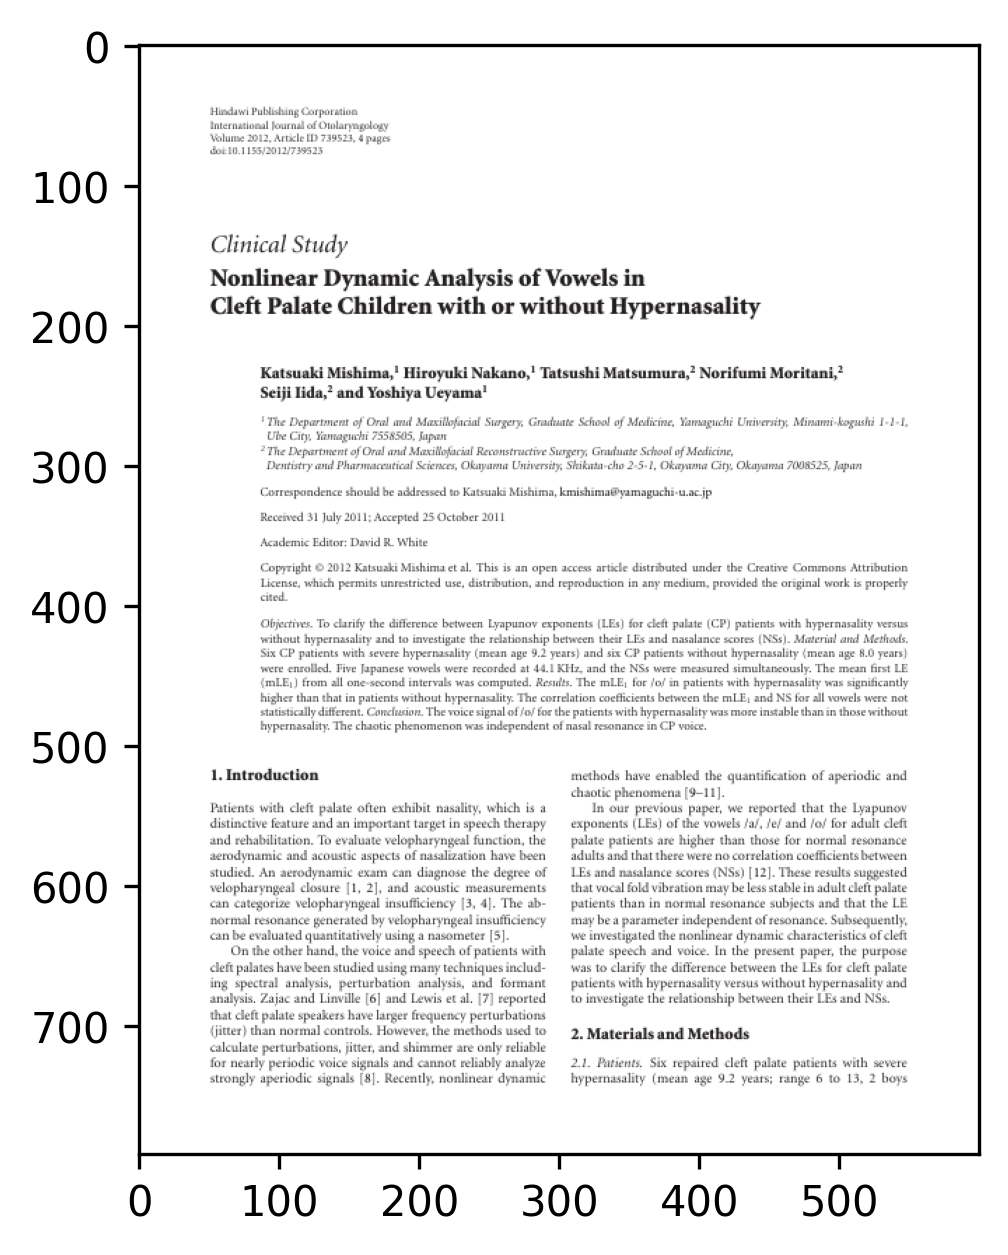

In [60]:
plt.figure(dpi=300)

def add_in_hesh(segments: list[ImageSegment], hash_seg:list, seg:ImageSegment):
    hash_seg.extend([index for index, segment in enumerate(segments) if segment.is_intersection(seg)])

img.show()
for hash_segs, segs in zip(hash_matrix, hash_image_seg):
    for hash_seg, seg in zip(hash_segs, segs):
        add_in_hesh(segments, hash_seg, seg)


In [85]:
right_edges = []
bottom_edges = []
for i in range(N+1):
    for j in range(M+1):
        if len(hash_matrix[j][i]) == 0:
            continue
        for k in range(j+1, M+1):
            if len(hash_matrix[k][i]) == 0:
                continue
            right_edges.append([(j, i), (k, i)])
            break
        for k in range(i+1, N+1):
            if len(hash_matrix[j][k]) == 0:
                continue
            bottom_edges.append([(j, i), (j, k)])
            break
            
        

In [88]:
import numpy as np

def get_min_segs(seg:ImageSegment, indexes, segments):
    seg_jj = [segments[i] for i in indexes ]
    dist = [seg.get_min_dist(seg_j) for seg_j in seg_jj]
    return indexes[np.argmin(dist)]


dists = []
for edge in right_edges:
    n1 = edge[0]
    n2 = edge[1]
    for index_seg in hash_matrix[n1[0]][n1[1]]:
        get_min_segs()     

0
3
4
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
22
23
24
25
26
27
29
34
0
1
2
3
4
6
10
15
22
22
27
29
34
1
2
5
6
8
14
15
22
22
28
29
30
31
32
33
34
35
37
38
39
6
8
10
11
13
14
22
22
26
29
34
6
7
9
12
16
17
19
20
21
22
22
23
24
25
28
29
46
47
48
49
30
31
32
33
34
50
51
52
53
54
35
37
38
39
55
56
57
58
59
5
6
22
22
47
49
54
59
6
11
13
22
22
26
46
47
49
50
51
52
53
54
55
56
57
58
59
6
22
22
48
49
54
7
12
16
17
19
20
21
22
22
23
24
25
46
48
49
50
51
52
53
54
55
56
57
58
59


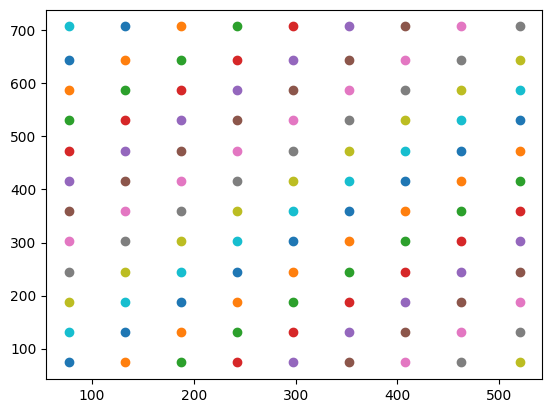

In [75]:
for segs in hash_image_seg:
    for seg in segs:
        x, y = seg.get_center()
        plt.scatter(x, y)


In [119]:
def fun_dist_bottom(seg1:ImageSegment, seg:ImageSegment):
    b = seg1.y_bottom_right # < t
    t = seg.y_top_left
    if seg1.x_bottom_right < seg.x_top_left or seg.x_bottom_right < seg1.x_top_left:
        return np.inf
    if b >= t:
        return np.inf
    else:
        return t-b
        
    
    
dists_bottom = []
for j, seg1 in enumerate(segments):
    dist_bottom = [fun_dist_bottom(seg1, seg) for seg in segments]
    if min(dist_bottom) == np.inf:
        continue
    k = np.argmin(dist_bottom)
    
    dists_bottom.append((j, k))

dists_top = [(d[1], d[0]) for d in dists_bottom]


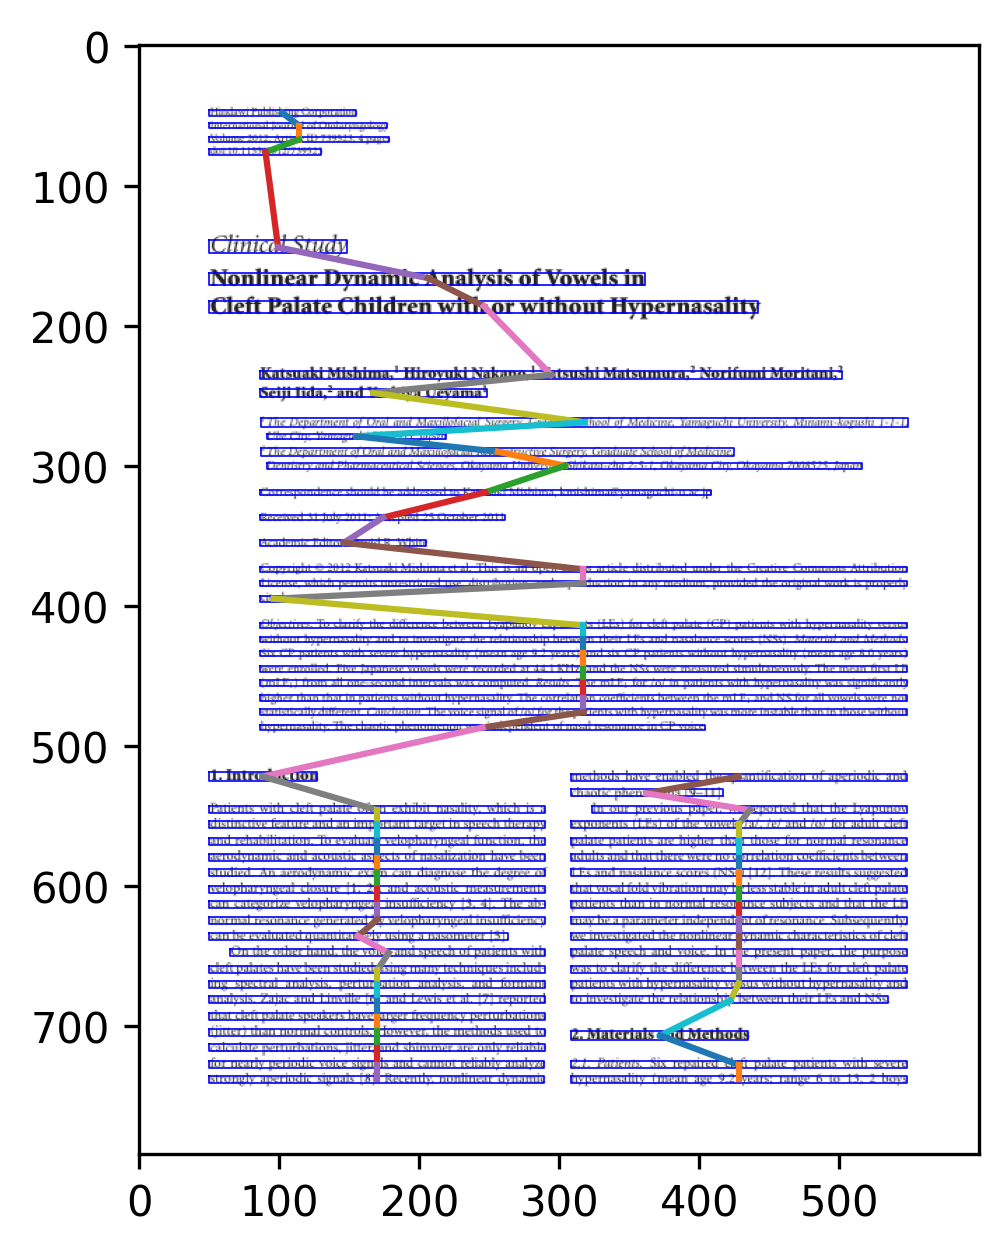

In [118]:
import matplotlib.pyplot as plt

plt.figure(dpi=300)
img.show()
for row in rows.rows:
    row.segment.plot(color='b', width=0.4)

for (n1, n2) in dists_bottom:
    x0, y0 = segments[n1].get_center()
    x1, y1 = segments[n2].get_center()
    plt.plot([x0, x1], [y0, y1])